# Long Short Term Memory

In [31]:
from whittaker_smooth import whittaker_smooth
from datetime import date

import matplotlib.pyplot as plt
import numpy as np
import utils

In [32]:
# TODO: Changes these values for parameters on a database.
location = "Kansas4"
BASE_DIR = ('D:\VSCode\Repositorios\Plant-Growth-Cycle-based-on-geospatial-data-1\DataExtraction\DataBase\\'+location)
bands =  ['B4','B3','B2','B8']

# Dictionaries of the images.
images_kansas19 = utils.load_landsat_image(BASE_DIR + '-2019', bands)
images_kansas20 = utils.load_landsat_image(BASE_DIR + '-2020', bands)
images_kansas21 = utils.load_landsat_image(BASE_DIR + '-2021', bands)
images_kansas22 = utils.load_landsat_image(BASE_DIR + '-2022', bands)

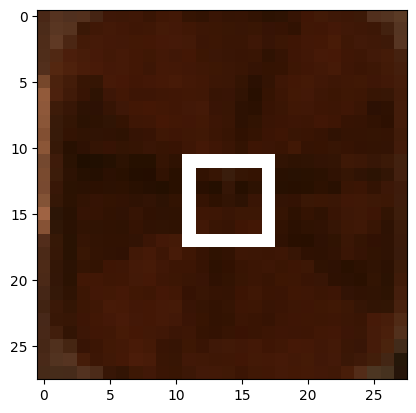

In [33]:
# Get the days after plant and the dates.
days_19, dates_19, hours_19 = utils.images_time_info(images_kansas19.keys(), initial_date = date(2019, 4, 1))
days_20, dates_20, hours_20 = utils.images_time_info(images_kansas20.keys(), initial_date = date(2020, 4, 1))
days_21, dates_21, hours_21 = utils.images_time_info(images_kansas21.keys(), initial_date = date(2021, 4, 1))
days_22, dates_22, hours_22 = utils.images_time_info(images_kansas22.keys(), initial_date = date(2022, 4, 1))

# Calculate the NDVI series over the crops.
ndvi_series_19 = utils.generate_ndvi_time_series(images_kansas19)
ndvi_series_20 = utils.generate_ndvi_time_series(images_kansas20)
ndvi_series_21 = utils.generate_ndvi_time_series(images_kansas21)
ndvi_series_22 = utils.generate_ndvi_time_series(images_kansas22)

In [34]:
# Apply a Whittaker Smooth filter.
ndvi_smooth_19 = whittaker_smooth(np.array(ndvi_series_19), lmbd=10)
ndvi_smooth_20 = whittaker_smooth(np.array(ndvi_series_20), lmbd=10)
ndvi_smooth_21 = whittaker_smooth(np.array(ndvi_series_21), lmbd=10)
ndvi_smooth_22 = whittaker_smooth(np.array(ndvi_series_22), lmbd=10)

In [35]:
# Apply an interpolation by splines.
x_19, y_19 = utils.interpolate_curve(days_19, ndvi_smooth_19)
x_20, y_20 = utils.interpolate_curve(days_20, ndvi_smooth_20)
x_21, y_21 = utils.interpolate_curve(days_21, ndvi_smooth_21)
x_22, y_22 = utils.interpolate_curve(days_22, ndvi_smooth_22)

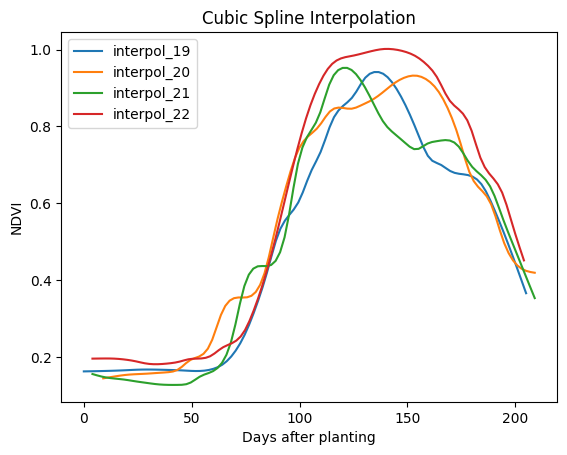

In [36]:
plt.plot(x_19, y_19, label='interpol_19')
plt.plot(x_20, y_20, label='interpol_20')
plt.plot(x_21, y_21, label='interpol_21')
plt.plot(x_22, y_22, label='interpol_22')
plt.title('Cubic Spline Interpolation')
plt.xlabel('Days after planting')
plt.ylabel('NDVI')
plt.legend()
plt.show()

In [38]:
import csv
import pandas as pd
path = ('D:\VSCode\Repositorios\Plant-Growth-Cycle-based-on-geospatial-data-1\Models\smoothed_data_'+location+'.csv')

dict = {'x_19': x_19, 'y_19': y_19,'x_20': x_20, 'y_20': y_20,'x_21': x_21, 'y_21': y_21,'x_22': x_22, 'y_22': y_22}

df = pd.DataFrame(dict)

# df.to_csv(path_or_buf = path, index=False)

df

,x_19,y_19,x_20,y_20,x_21,y_21,x_22,y_22
0,0.000000,0.162155,9.000000,0.144072,4.000000,0.155310,4.000000,0.195384
1,2.070707,0.162364,11.020202,0.145943,6.070707,0.151906,6.020202,0.195560
2,4.141414,0.162579,13.040404,0.147805,8.141414,0.148848,8.040404,0.195705
3,6.212121,0.162811,15.060606,0.149647,10.212121,0.146463,10.060606,0.195786
4,8.282828,0.163066,17.080808,0.151373,12.282828,0.144749,12.080808,0.195721
...,...,...,...,...,...,...,...,...
95,196.717172,0.493387,200.919192,0.438117,200.717172,0.467936,195.919192,0.595954
96,198.787879,0.462239,202.939394,0.429377,202.787879,0.439027,197.939394,0.558167
97,200.858586,0.430412,204.959596,0.424029,204.858586,0.410207,199.959596,0.520364
98,202.929293,0.398163,206.979798,0.420942,206.929293,0.381542,201.979798,0.485090
